In [507]:
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [508]:
People_orig = pd.read_excel('/Users/joebacchus/Desktop/Everyone.xlsx').replace(np.nan, '', regex=True)
People_orig = People_orig[['Name','Birthday','Gender','Parents','Spouse(s)','Birth Location']]
All_names = list(People_orig['Name'])

In [509]:
People_pa = People_orig
People_pa['Parents'] = People_pa['Parents'].str.split(', ')
People_pa = People_pa.explode('Parents')
parent_rel = People_pa.reset_index(drop=True)[['Parents','Name']]

In [510]:
People_sp = People_orig
People_sp['Spouse(s)'] = People_sp['Spouse(s)'].str.split(', ')
People_sp = People_sp.explode('Spouse(s)')
spouse_rel = People_sp.reset_index(drop=True)[['Spouse(s)','Name']]

In [511]:
counter_ID = 0
counter_ID_NODES = []
RELATIONSHIPS = []
spouses_black_list = []

for i in range(len(All_names)):
    spouses = list(spouse_rel.loc[spouse_rel['Name'] == All_names[i]]['Spouse(s)'])
    if All_names[i] not in spouses_black_list:
        if spouses[0] != '': 
            for j in range(len(spouses)):
                spouses_black_list.append(spouses[j])
                counter_ID += 1
                counter_ID_NODES.append(counter_ID)
                RELATIONSHIPS.append(list((counter_ID,All_names[i])))
                RELATIONSHIPS.append(list((counter_ID,spouses[j])))
                children1 = list(parent_rel.loc[parent_rel['Parents'] == spouses[j]]['Name'])
                children2 = list(parent_rel.loc[parent_rel['Parents'] == All_names[i]]['Name'])
                children = list(set(children1).intersection(children2))
                if len(children) != 0:
                    for k in range(len(children)):
                        RELATIONSHIPS.append(list((counter_ID,children[k])))

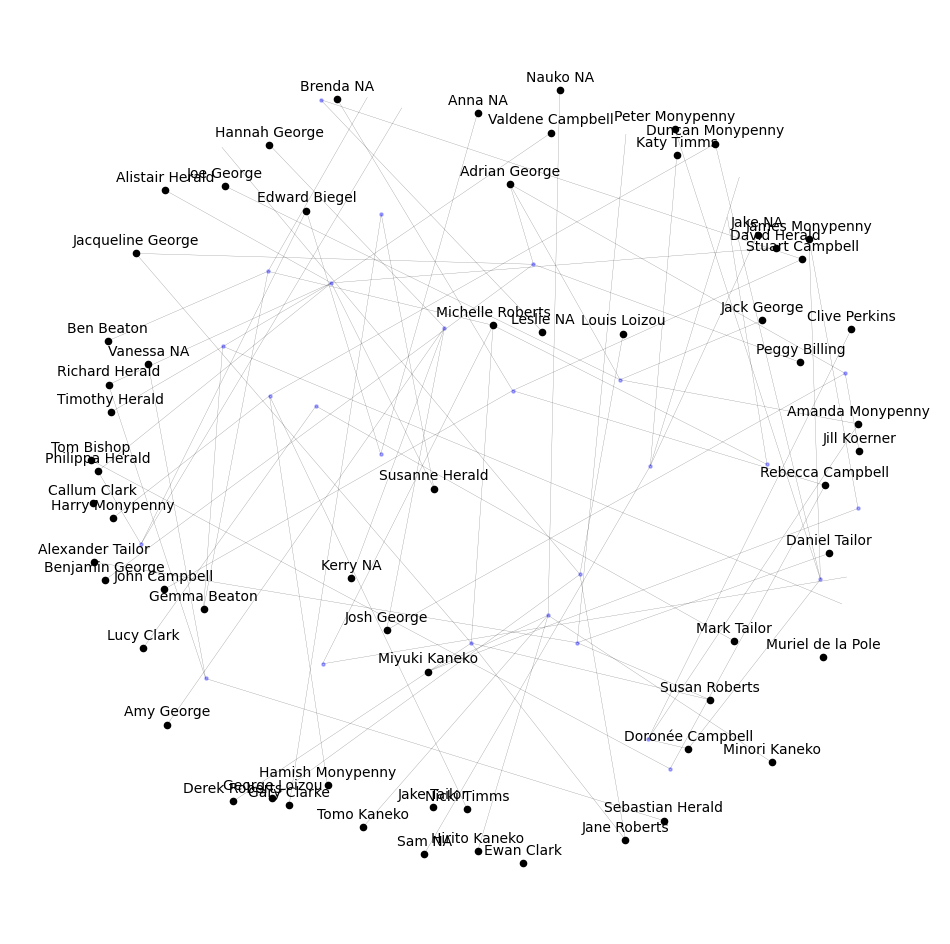

In [514]:
plt.figure(figsize=(12, 12))

graph = nx.Graph()
graph.add_nodes_from(counter_ID_NODES, bipartite=0)
graph.add_nodes_from(All_names, bipartite=1)
graph.add_edges_from(RELATIONSHIPS)

def nudge(pos, x_shift, y_shift):
    return {n: (x + x_shift, y + y_shift) for n, (x, y) in pos.items()}

pos = nx.spring_layout(graph,k=10/np.sqrt(graph.order()))
pos_nudge = nudge(pos, 0, 0.03)  # Optional: nudge the node positions if desired

nx.draw_networkx_nodes(graph,
                       pos=pos,
                       nodelist=All_names,
                       node_color='black',
                       node_size=20)

nx.draw_networkx_nodes(graph,
                       pos=pos,
                       nodelist=counter_ID_NODES,
                       alpha=0.3,
                       node_color='blue',
                       node_size=5)

nx.draw_networkx_labels(graph,
                        pos=pos_nudge,
                        labels={node: node for node in All_names},
                        font_color="black",
                        font_size=10)

nx.draw_networkx_edges(graph,
                       pos=pos,
                       edgelist=RELATIONSHIPS,
                       width=0.2,
                       alpha=0.5,
                       arrowsize=5)

plt.axis("off")
plt.show()